# Exercise 4: Hate Speech Classification using Multinomial Naive Bayes

Instructions:
- You do not need to split your data. Use the training, validation and test sets provided below.
- Use Multinomial Naive Bayes to train a model that can classify if a sentence is a hate speech or non-hate speech
- A sentence with a label of zero (0) is classified as non-hate speech
- A sentence with a label of one (1) is classified as a hate speech

Apply text pre-processing techniques such as
- Converting to lowercase
- Stop word Removal
- Removal of digits, special characters
- Stemming or Lemmatization but not both
- Count Vectorizer or TF-IDF Vectorizer but not both

Evaluate your model by:
- Providing input by yourself
- Creating a Confusion Matrix
- Calculating the Accuracy, Precision, Recall and F1-Score

In [110]:
import pandas as pd

In [111]:
splits = {'train': 'unique_train_dataset.csv', 'validation': 'unique_validation_dataset.csv', 'test': 'unique_test_dataset.csv'}

**Training Set**

Use this to train your model

In [112]:
df_train = pd.read_csv("hf://datasets/mapsoriano/2016_2022_hate_speech_filipino/" + splits["train"])

df_train.head()

,text,label
0,Presidential candidate Mar Roxas implies that ...,1
1,Parang may mali na sumunod ang patalastas ng N...,1
2,Bet ko. Pula Ang Kulay Ng Posas,1
3,[USERNAME] kakampink,0
4,Bakit parang tahimik ang mga PINK about Doc Wi...,1


**Validation Set**

Use this set to evaluate your model

In [113]:
df_validation = pd.read_csv("hf://datasets/mapsoriano/2016_2022_hate_speech_filipino/" + splits["validation"])

**Test Set**
  
Use this set to test your model

In [114]:
df_test = pd.read_csv("hf://datasets/mapsoriano/2016_2022_hate_speech_filipino/" + splits["test"])

## A. Understanding your training data

1. Check the first 10 rows of the training dataset

In [115]:
df_train.head(10)

,text,label
0,Presidential candidate Mar Roxas implies that ...,1
1,Parang may mali na sumunod ang patalastas ng N...,1
2,Bet ko. Pula Ang Kulay Ng Posas,1
3,[USERNAME] kakampink,0
4,Bakit parang tahimik ang mga PINK about Doc Wi...,1
5,"""Ang sinungaling sa umpisa ay sinungaling hang...",1
6,Leni Kiko,0
7,Nahiya si Binay sa Makati kaya dito na lang sa...,1
8,Another reminderHalalan,0
9,[USERNAME] Maybe because VP Leni Sen Kiko and ...,0


2. Check how many rows and columns are in the training dataset using `.info()`

In [116]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21773 entries, 0 to 21772
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    21773 non-null  object
 1   label   21773 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 340.3+ KB


3. Check for NaN values

In [117]:
df_train.isna().sum()

text     0
label    0
dtype: int64

4. Check for duplicate rows

In [118]:
pd.DataFrame(df_train)

duplicate_rows = df_train.duplicated()

print("Duplicated Rows:", duplicate_rows)

Duplicated Rows: 0        False
1        False
2        False
3        False
4        False
         ...  
21768    False
21769    False
21770    False
21771    False
21772    False
Length: 21773, dtype: bool


5. Check how many rows belong to each class

In [119]:
# For Label columns
df_train["label"].value_counts()

label
1    10994
0    10779
Name: count, dtype: int64

In [120]:
# For Text columns
df_train["text"].value_counts()

text
Presidential candidate Mar Roxas implies that the govt should not be liable re: Laglag Bala. Laglag Bayag na ata ito                                                       1
Parang may mali na sumunod ang patalastas ng Nescaf Coffee Black sa commercial ni Binay. Parang lang naman.                                                                1
Bet ko. Pula Ang Kulay Ng Posas                                                                                                                                            1
[USERNAME] kakampink                                                                                                                                                       1
Bakit parang tahimik ang mga PINK about Doc Willie Ong? No reaction paper.                                                                                                 1
                                                                                                                                  

## B. Text pre-processing

6. Remove duplicate rows

In [121]:
df_train.drop_duplicates(inplace=True)

7. Remove rows with NaN values

In [122]:
df_train.dropna(inplace=True)

8. Convert all text to lowercase

In [123]:
df_train["text"] = df_train["text"].str.lower()

9. Remove digits, URLS and special characters

In [124]:
import re
df_train['text'] = df_train['text'].apply(lambda x: re.sub(r'http\S+', '', x))
df_train['text'] = df_train['text'].apply(lambda x: re.sub(r'\d+', '', x))
df_train['text'] = df_train['text'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

10. Remove stop words

In [125]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
df_train['text'] = df_train['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

[nltk_data] Downloading package stopwords to /home/romory/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


11. Use Stemming or Lemmatization

In [126]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
df_train["text"] = df_train["text"].apply(lambda x: " ".join([stemmer.stem(word) for word in x.split()]))

## C. Training your model

12. Put all text training data in variable **X_train**

In [127]:
x_train = df_train["text"]

13. Put all training data labels in variable **y_train**

In [128]:
y_train = df_train["label"]

14. Use `CountVectorizer()` or `TfidfVectorizer()` to convert text data to its numerical form.

Put the converted data to **X_train_transformed** variable

In [129]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X_train_transformed = vectorizer.fit_transform(x_train)

15. Create an instance of `MultinomalNB()`

In [130]:
from sklearn.naive_bayes import MultinomialNB
multi_nb = MultinomialNB()

16. Train the model using `.fit()`

In [131]:
multi_nb.fit(X_train_transformed, y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


## D. Evaluate your model

17. Use `.predict()` to generate model predictions using the **validation dataset**


- Put all text validation data in **X_validation** variable

- Convert **X_validation** to its numerical form.

- Put the converted data to **X_validation_transformed**

- Put all predictions in **y_validation_pred** variable

In [132]:
X_validation = df_validation["text"]
X_validation_transformed = vectorizer.transform(X_validation)
y_validation_pred = multi_nb.predict(X_validation_transformed)

18. Get the Accuracy, Precision, Recall and F1-Score of the model using the **validation dataset**

- Put all validation data labels in **y_validation** variable

In [133]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_validation = df_validation["label"]
accuracy = accuracy_score(y_validation, y_validation_pred)
precision = precision_score(y_validation, y_validation_pred)
recall = recall_score(y_validation, y_validation_pred)
f1 = f1_score(y_validation, y_validation_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Accuracy: 0.8228571428571428
Precision: 0.7917460317460318
Recall: 0.8812720848056537
F1-Score: 0.834113712374582


19. Create a confusion matrix using the **validation dataset**

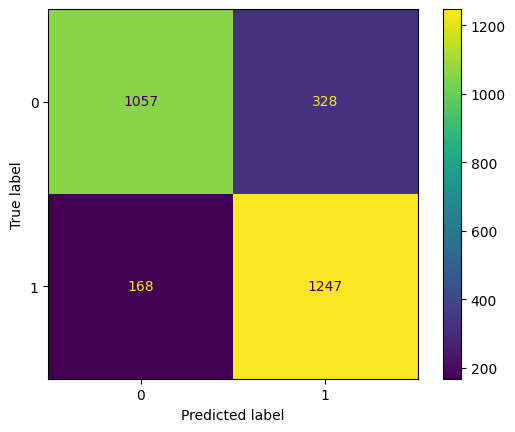

In [134]:
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
matrix = confusion_matrix(y_validation, y_validation_pred)

display = ConfusionMatrixDisplay(confusion_matrix=matrix)
display.plot()
plt.show()

20. Use `.predict()` to generate the model predictions using the **test dataset**


- Put all text validation data in **X_test** variable

- Convert **X_test** to its numerical form.

- Put the converted data to **X_test_transformed**

- Put all predictions in **y_test_pred** variable

In [135]:
X_test = df_test["text"]
X_test_transformed = vectorizer.transform(X_test)
y_test_pred = multi_nb.predict(X_test_transformed)

21. Get the Accuracy, Precision, Recall and F1-Score of the model using the **test dataset**

- Put all test data labels in **y_validation** variable



In [136]:
y_test = df_test["label"]
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Accuracy: 0.8227758007117437
Precision: 0.7914507772020726
Recall: 0.8741058655221745
F1-Score: 0.8307273963290279


22. Create a confusion matrix using the **test dataset**

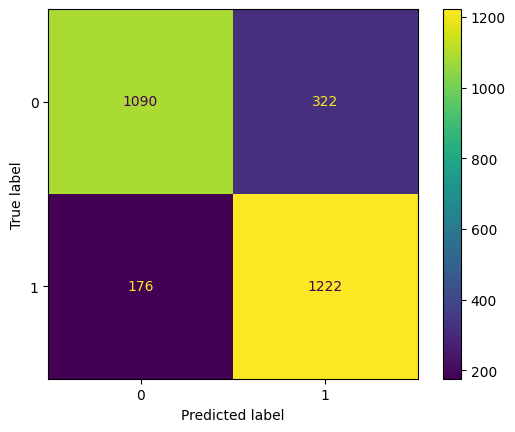

In [137]:
matrix = confusion_matrix(y_test, y_test_pred)

test_matrix = ConfusionMatrixDisplay(confusion_matrix=matrix)
test_matrix.plot()
plt.show()

## E. Test the model

23. Test the model by providing a non-hate speech input. The model should predict it as 0

In [138]:
input_text = "I'm happy for you"
input_text_transformed = vectorizer.transform([input_text])
prediction = multi_nb.predict(input_text_transformed)
print(prediction)

[0]


24. Test the model by providing a hate speech input. The model should predict it as 1

In [139]:
input_text = "Ang tanga tanga!"
input_text_transformed = vectorizer.transform([input_text])
prediction = multi_nb.predict(input_text_transformed)
print(prediction)

[1]
